数据预览：
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target species  
0       0  setosa  
1       0  setosa  
2       0  setosa  
3       0  setosa  
4       0  setosa  


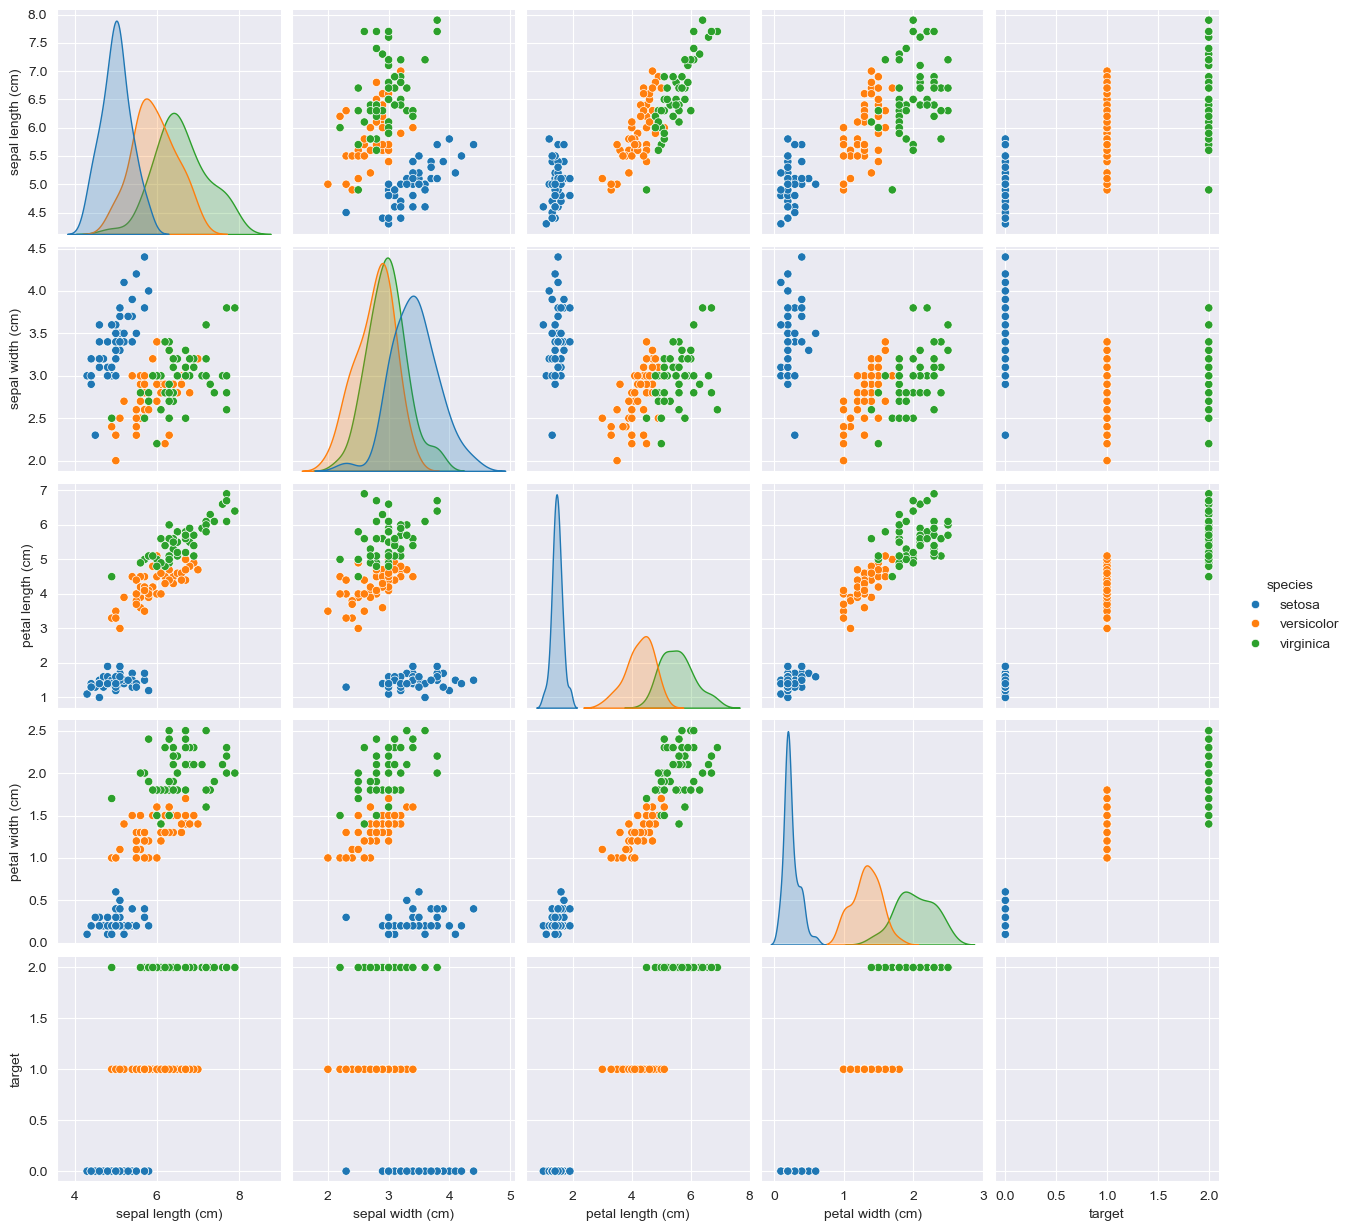

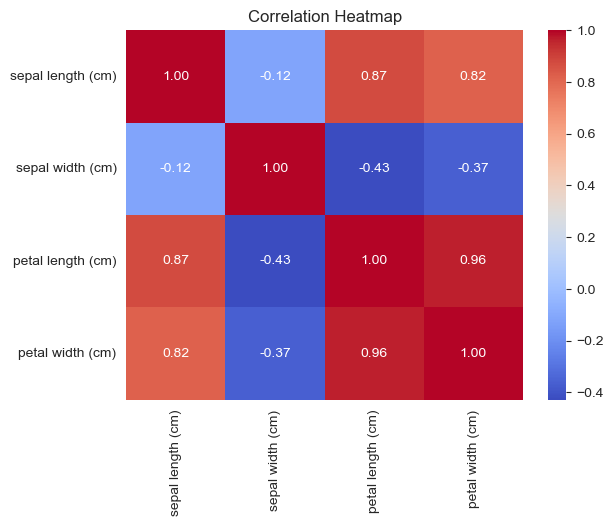

Decision Tree Accuracy: 1.0000
SVM Accuracy: 0.9667

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Decision Tree Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

SVM Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30


SVM Confusion Matrix:
[[10  0  0]
 [ 0  8  1]
 [ 

In [1]:
### 整体完整代码
# 导入必要的库
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. 数据加载
# 加载鸢尾花数据集
data = load_iris()

# 转换为 DataFrame 方便查看
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df['species'] = df['target'].apply(lambda x: data.target_names[x])

# 查看前几行数据
print("数据预览：")
print(df.head())

# 2. 数据可视化
# 绘制特征之间的关系
sns.pairplot(df, hue="species")
plt.show()

# 绘制热力图查看特征之间的相关性
correlation_matrix = df.drop(columns=['target', 'species']).corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# 3. 特征选择与数据预处理
# 提取特征和标签
X = df.drop(columns=['target', 'species'])
y = df['target']

# 数据标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. 建立分类模型
# 划分数据集
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 使用决策树分类器
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train, y_train)

# 预测
y_pred_dt = model_dt.predict(X_test)

# 输出决策树的准确率
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt:.4f}")

# 使用支持向量机（SVM）分类器
model_svm = SVC(kernel='linear', random_state=42)
model_svm.fit(X_train, y_train)

# 预测
y_pred_svm = model_svm.predict(X_test)

# 输出SVM的准确率
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm:.4f}")

# 5. 模型评估
# 决策树模型评估
print("\nDecision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))

print("\nDecision Tree Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))

# SVM模型评估
print("\nSVM Classification Report:")
print(classification_report(y_test, y_pred_svm))

print("\nSVM Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))

# 6. 网格搜索调优
# 定义决策树的参数网格
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# 初始化 GridSearchCV
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# 获取最佳参数和最佳模型
print("\nBest Parameters from GridSearchCV (Decision Tree):")
print(grid_search.best_params_)

# 使用最佳模型进行预测
best_model = grid_search.best_estimator_
y_pred_optimized = best_model.predict(X_test)

# 输出优化后的决策树准确率
accuracy_optimized = accuracy_score(y_test, y_pred_optimized)
print(f"Optimized Decision Tree Accuracy: {accuracy_optimized:.4f}")

# 7. 交叉验证
# 进行 5 折交叉验证
cross_val_scores = cross_val_score(best_model, X_scaled, y, cv=5)
print("\nCross-validation Scores (Optimized Decision Tree):")
print(cross_val_scores)
print(f"Mean CV Accuracy: {cross_val_scores.mean():.4f}")

In [2]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler

X = df.drop(columns=['target', 'species'])
y = df['target']

## 标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## 选择最相关的2个特征
selector = SelectKBest(f_classif, k=2)
X_new = selector.fit_transform(X, y)
## 获取选择的特征列对应的bool数组
selected_features = selector.get_support()
X_new, selected_features, X.columns[selected_features]

(array([[1.4, 0.2],
        [1.4, 0.2],
        [1.3, 0.2],
        [1.5, 0.2],
        [1.4, 0.2],
        [1.7, 0.4],
        [1.4, 0.3],
        [1.5, 0.2],
        [1.4, 0.2],
        [1.5, 0.1],
        [1.5, 0.2],
        [1.6, 0.2],
        [1.4, 0.1],
        [1.1, 0.1],
        [1.2, 0.2],
        [1.5, 0.4],
        [1.3, 0.4],
        [1.4, 0.3],
        [1.7, 0.3],
        [1.5, 0.3],
        [1.7, 0.2],
        [1.5, 0.4],
        [1. , 0.2],
        [1.7, 0.5],
        [1.9, 0.2],
        [1.6, 0.2],
        [1.6, 0.4],
        [1.5, 0.2],
        [1.4, 0.2],
        [1.6, 0.2],
        [1.6, 0.2],
        [1.5, 0.4],
        [1.5, 0.1],
        [1.4, 0.2],
        [1.5, 0.2],
        [1.2, 0.2],
        [1.3, 0.2],
        [1.4, 0.1],
        [1.3, 0.2],
        [1.5, 0.2],
        [1.3, 0.3],
        [1.3, 0.3],
        [1.3, 0.2],
        [1.6, 0.6],
        [1.9, 0.4],
        [1.4, 0.3],
        [1.6, 0.2],
        [1.4, 0.2],
        [1.5, 0.2],
        [1.4, 0.2],


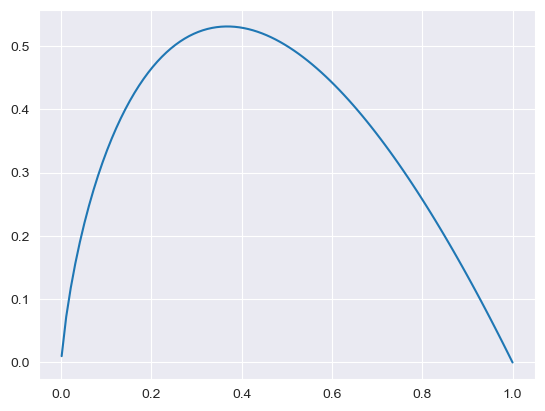

In [14]:
x = np.linspace(0.001, 1, 100)
y = -1 * x * np.log2(x)

import matplotlib.pyplot as plt

plt.plot(x, y)
